### -독립변수 : 특성을 자유롭게 조합해 가면서 검증해 보기
##### ....(특성을 자유롭게 조합하여 적용해 가면서 정확도 차이 확인)
##### ....(전체 특성을 모두 적용해 보세요)
##### - 사용한 모델별로 , 예측(predict) 을 통한 결과를 , 데이터프레임에 col_predict컬럼명으로 추가하기

In [ ]:
# [문제] 와인 데이터 사용
# 와인의 화학 조성을 사용하여 와인의 종류 예측 (자유롭게)..

# ** 특성 이름을 담고 있는 key 값 = feature_names
# ** 특성 데이터를 담고 있는 key 값 = data
# ** 범주 와인의 종류를 담고 있는 key 값 = target_names
#    -범주는 'class_0'과 'class_1'만 사용 (0과 1로 변경하여 사용)
#    -(0 =레드와인, 1 = 화이트와인)

#알콜(ALcohol)
#말산(Malic acid)
#회분(Ash)
#회분의 알칼리도(Alcalinity of ash)
#마그네슘(Magnesium)
#총 폴리페놀(Total phenols)
#플라보노이드 폴리페놀(Flavanoids)
#비 플라보노이드 폴리페놀(Nonflavanoid phenols)
#프로안토시아닌(Proanthocyanins)
#색상의 강도(Color intensity)
#색상(Hue)
#희석 와인의 OD280/OD315 비율( OD280/OD315 of diluted wines)
#프롤린(Proline)

In [345]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [346]:
wine_all = load_wine()

wine_input = np.array(wine_all['data'][0:130])
wine_target = np.array(wine_all['target'][0:130])

In [347]:
train_input, test_input, train_target, test_target = train_test_split(wine_input,wine_target,test_size = 0.25,random_state=42)

In [348]:
### 종류 특성의 고유한 값 조회하기
# print(pd.unique(wine_input))
print(train_target)

[0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1
 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0
 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1]


In [349]:
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)


(97, 13)
(97,)
(33, 13)
(33,)


## k- 최근접이웃

In [350]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()


In [351]:
kn.fit(train_input, train_target)
train_k =kn.score(train_input, train_target)
test_k=kn.score(test_input,test_target)


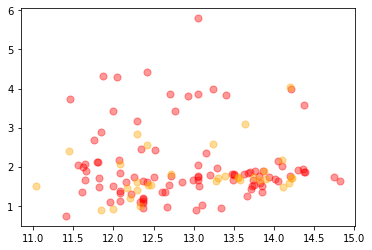

In [352]:
plt.scatter(train_input[:,0],train_input[:,1],color = 'red', alpha = 0.4, s = 50)
plt.scatter(test_input[:,0],test_input[:,1],color = 'orange', alpha = 0.4, s = 50)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [356]:
predict = kn.predict(test_input)
data_k['predict'] = pd.DataFrame(predict)


In [340]:
mean = np.mean(train_input, axis = 0) #aixs=0 (행)


TypeError: 'numpy.float64' object does not support item assignment

In [312]:
std =np.std(train_input, axis = 0)
std

array([8.78710504e-01, 9.41769432e-01, 3.06234333e-01, 3.68194198e+00,
       1.37283129e+01, 5.61135924e-01, 7.63649173e-01, 1.08934589e-01,
       5.48662893e-01, 1.62462004e+00, 1.51339925e-01, 4.94300151e-01,
       3.36251281e+02])

In [313]:
train_scaled = (train_input - mean) / std
train_scaled

array([[ 0.66604158, -0.2193721 ,  0.86046902, ...,  0.45027332,
         1.79677131,  0.24962922],
       [-0.61993372, -0.89894396, -1.39270748, ...,  0.45027332,
         1.10893013, -0.74664951],
       [-1.7124437 , -1.3555313 ,  0.50126697, ...,  0.31812048,
        -1.25805276, -0.97267096],
       ...,
       [ 1.66750907, -0.15566224,  0.10941018, ...,  0.97888465,
         0.13786022,  2.33735361],
       [-0.25576372, -0.51668479, -0.2824466 , ..., -0.60694936,
        -1.76381834, -0.79125901],
       [-0.65407465,  0.46019975,  0.37064804, ..., -1.66417203,
         0.9066239 , -0.96077509]])

In [369]:
data_k['predict'] = pd.DataFrame(predict)
data_k['mean'] = pd.DataFrame(mean)
data_k['std'] = pd.DataFrame(std)
for i in train_scaled:
    data_k['train_scaled']=pd.DataFrame(i)
    
data_k

,0,predict,mean,std,train_scaled
0,0,0,12.914742,0.878711,-0.654075
1,0,0,2.016598,0.941769,0.460200
2,0,0,2.346495,0.306234,0.370648
3,0,0,19.102062,3.681942,0.515472
4,1,1,98.134021,13.728313,-0.009762
5,0,0,2.514021,0.561136,0.081940
6,1,1,2.451340,0.763649,-0.446986
7,1,1,0.340515,0.108935,-0.004732
8,1,1,1.704536,0.548663,-0.719087
9,0,0,4.117423,1.624620,-0.810911


## k-최근접이웃 회귀 클래스(모델 생성)

In [314]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor()

In [317]:
knr.fit(train_input, train_target)

print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.871567944250871
0.7066666666666666


In [318]:
test_prediction = knr.predict(test_input)
test_prediction

array([0. , 0.2, 0.2, 0. , 1. , 0.2, 0.6, 1. , 0.8, 0. , 0.2, 0. , 1. ,
       0.2, 1. , 0.8, 0.2, 1. , 1. , 1. , 0. , 0. , 1. , 0. , 1. , 0. ,
       0.2, 0.2, 0.2, 0. , 0. , 0. , 0. ])

### 오차 확인하기

In [319]:
from sklearn.metrics import mean_absolute_error


In [320]:
knr.score(test_input,test_target)

0.7066666666666666

In [321]:
mea = mean_absolute_error(test_target, test_prediction)
mea

0.13333333333333333

##### 이웃의 갯수 정하기

In [215]:
knr.n_neighbors=3
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))
print(knr.score(train_input, train_target))

0.728395061728395
0.8920344560588463


In [324]:
train = []
for i in range(1, len(train_input)):
    knr=KNeighborsRegressor(n_neighbors=i)
    knr.fit(train_input, train_target)
    train.append(knr.score(train_input, train_target))
    # print(knr.score(test_input, test_target))
train
train = pd.DataFrame(train)
train


,0
0,1.000000
1,0.926067
2,0.892034
3,0.875898
4,0.871568
...,...
91,0.085277
92,0.067387
93,0.049773
94,0.032640


## 다항 회귀분석

In [217]:
train_poly = np.column_stack((train_input**2,train_input))
train_poly.shape

(97, 26)

In [218]:
test_poly = np.column_stack((test_input**2,test_input))
test_poly.shape

(33, 26)

In [219]:
import sklearn.Line
lr=LinearRegression()
# 훈련모델 생성
lr.fit(train_poly,train_target)
# - 예측데이터 : 길이 50으로 무게 예측
print(lr.predict([[50**2,50]]))
# - 계수 확인(coef_, intercept_)
print(lr.coef_,lr.intercept_)
# - 산점도 그리기 : 훈련데이터, 예측데이터, 추세선
plt.scatter(train_input,train_target)
plt.scatter([50],[1573.98],c='red',marker='^')

#추세선 그리기
point = np.arange(15,51)
plt.plot(point,1.01*point**2 - 21.6*point +116.05)

   
    
plt.show()

ValueError: X has 2 features, but LinearRegression is expecting 26 features as input.

In [195]:
print('훈련 =',lr.score(train_poly,train_target))
print('테스트 =',lr.score(test_poly,test_target))

훈련 = 0.91921302104927
테스트 = 0.8470338735043816


## 다중회귀모델


In [221]:
from sklearn.preprocessing import PolynomialFeatures

In [223]:
poly = PolynomialFeatures(include_bias = False)

poly.fit(train_input)


train_poly = poly.transform(train_input)

test_poly = poly.transform(test_input)


In [228]:

poly.get_feature_names_out()

array(['x0', 'x1', 'x2', ..., 'x11^2 x12^3', 'x11 x12^4', 'x12^5'],
      dtype=object)

In [225]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

1.0
-9.923771867304374


In [226]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [229]:
ss.fit(train_poly, train_target)

StandardScaler()

In [230]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

릿지

In [233]:
from sklearn.linear_model import Ridge

In [234]:
ridge = Ridge()

ridge.fit(train_scaled,train_target)

print(ridge.score(train_scaled,train_target))

print(ridge.score(test_scaled, test_target))

0.9989180653390148
0.5634676315054693


라쏘

In [235]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso.fit(train_scaled,train_target)

print(lasso.score(train_scaled,train_target))

print(lasso.score(test_scaled, test_target))

0.0
-0.06079640060934577


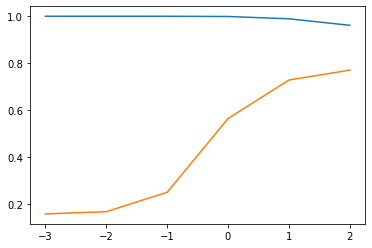

In [236]:
train_score = []
# 테스트 시 발생하는 결정계수를 저장할 리스트
test_score = []

#임의 alpha 값(x축으로 설정합니다.) 설정(범위 설정)
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

###훈련 및 테스트 결정계수 데이터 조회하기
for alpha in alpha_list:
    #릿지 모델
    ridge = Ridge(alpha = alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))
    
###그래프로 시각화
# -log10: 지수로 표현
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [250]:
#릿지 모델
ridge = Ridge(alpha = 13)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9870543953563579
0.7319605128819422


## 로지스틱 회귀분류

In [106]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()


StandardScaler()

In [251]:
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [256]:
kn = KNeighborsClassifier(n_neighbors=2)

kn.fit(train_scaled, train_target)

### 훈련데이터 정확도
print(kn.score(train_scaled, train_target))
### 테스트데이터 정확도
print(kn.score(test_scaled, test_target))


0.9484536082474226
0.9393939393939394


In [258]:
np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1]])

In [259]:
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [260]:
print(kn.classes_)

[0 1]


In [261]:
target_bream_smelt = train_target[(train_target ==0) | 
                                  (train_target == 1)]
target_bream_smelt.shape

train_bream_smelt = train_scaled[(train_target == 0) | \
                                  (train_target == 1)]
train_bream_smelt.shape

(97, 13)

In [263]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [264]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-1.99285964  3.97249921  7.22504494  6.26033008 -6.34674047]
[0.11995465 0.98152156 0.99927241 0.99809303 0.00174938]


In [265]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[8.80045346e-01 1.19954654e-01]
 [1.84784422e-02 9.81521558e-01]
 [7.27590042e-04 9.99272410e-01]
 [1.90697154e-03 9.98093028e-01]
 [9.98250616e-01 1.74938429e-03]]


## 결정트리

In [289]:
from sklearn.tree import DecisionTreeClassifier

df = DecisionTreeClassifier(random_state=42)

df.fit(train_scaled,train_target)

print(df.score(train_scaled, train_target))
print(df.score(test_scaled, test_target))

1.0
0.9696969696969697


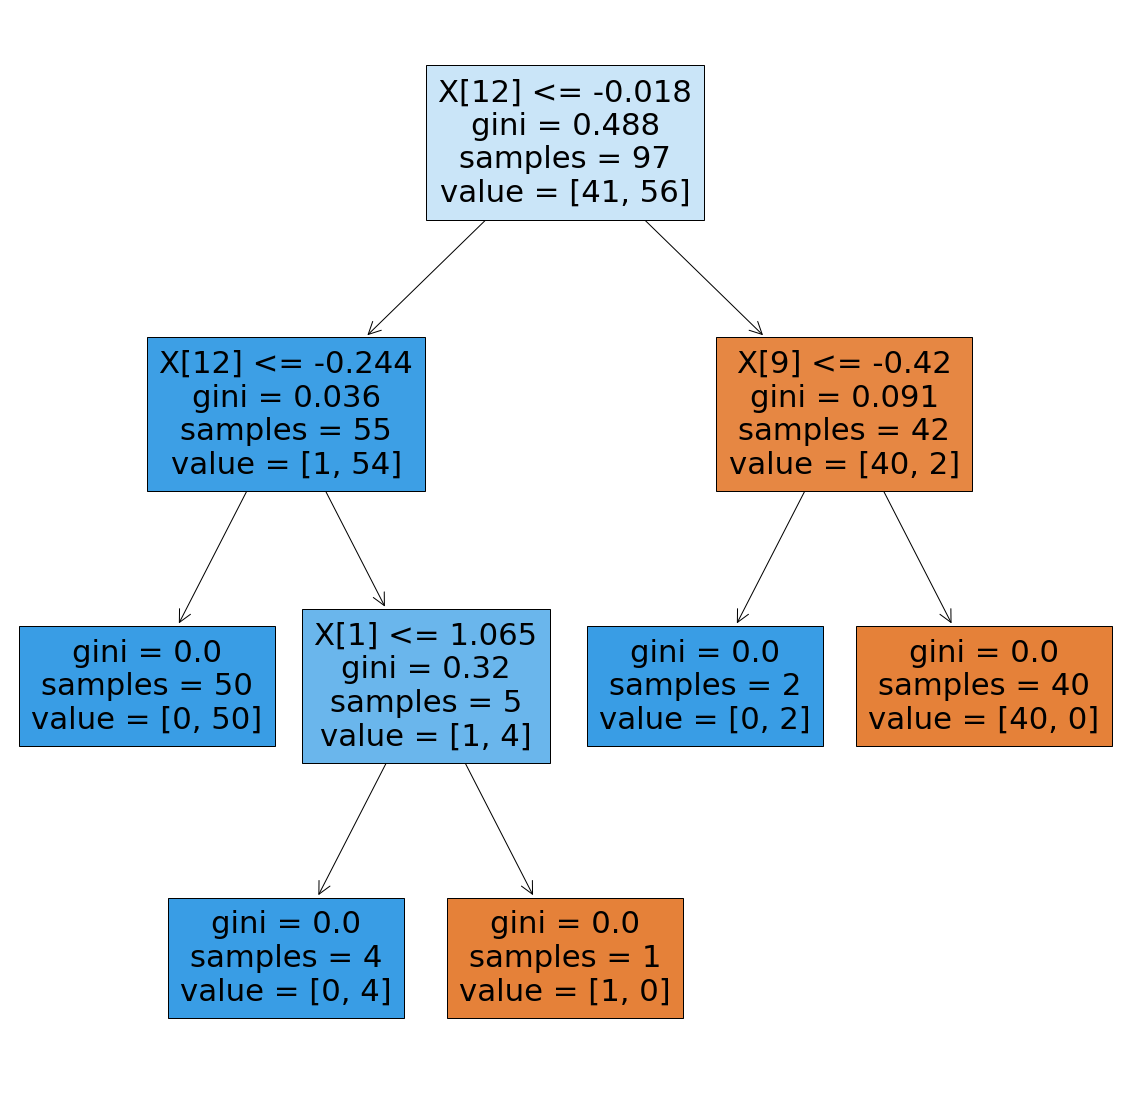

In [294]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


plt.figure(figsize =(20,20))
plot_tree(df, max_depth=3, filled=True)
plt.show()

In [296]:
print(df.feature_importances_)

[0.         0.03379791 0.         0.         0.         0.
 0.         0.         0.         0.08047121 0.         0.
 0.88573088]
